<a href="https://www.kaggle.com/code/manjitbaishya001/house-price-prediction-ml-and-dl?scriptVersionId=171022420" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **HOUSE PRICE TREND ANALYSIS & PREDICTION**
Please note that is is an active notebook and the project has not been completed yet!

# **Objectives**
**1. General Overview:**
   - What is the average price of properties in the dataset?
   - What is the distribution of property types (e.g., flats, houses, penthouses)?
   - How many properties are listed for sale, and in which cities?

**2. Location Analysis:**
   - Which locations have the highest and lowest average property prices?
   - What are the most popular locations based on the number of listings?

**3. Property Characteristics:**
   - What is the average number of bedrooms and bathrooms for listed properties?
   - How does property size vary across different types and locations?

**4. Feature Importance:**
   - Which features (e.g., location, number of bedrooms) contribute the most to predicting property prices?
   - Can we identify the top features that influence the model's predictions?

**10. Property Type Classification:**
   - Can we use machine learning to classify properties into different types (e.g., flat, house, penthouse) based on their features?
   - What is the accuracy of classification models in identifying property types?

**11. Location-based Clustering:**
   - Are there natural clusters of properties based on their location, and can we identify them using machine learning clustering algorithms?
   - How well do clustering algorithms group similar properties together?

**12. Outlier Detection with ML:**
   - Can machine learning algorithms automatically detect outliers or high-value properties in the dataset?
   - How effective are anomaly detection methods in identifying unusual property listings?

**13. Optimal Property Selection:**
   - Can machine learning help identify the optimal combination of features for a property that maximizes its sale price or rental income?
   - How well can models recommend suitable properties based on user preferences?

**14. Customer Segmentation:**
   - Are there distinct segments of customers with specific preferences for property features?
   - Can machine learning algorithms identify and characterize these customer segments?

**15. Property Investment Risk Assessment:**
   - How can machine learning assist in assessing the risk associated with investing in certain types of properties or locations?
   - Can we build a model to predict potential property value fluctuations?

**16. Predictive Modeling:**
   - Can we build a machine learning model to predict property prices based on features such as location, number of bedrooms, and size?
   - What is the performance (accuracy, RMSE, etc.) of different regression models for predicting property prices?

***Happy Processing!!!***

# **Importing Data**

---

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# finding source
import os

# removing warnings
import warnings 
warnings.filterwarnings("ignore")

# data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# disabling warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# importing source file
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        src = os.path.join(dirname, filename)

# importing file
df = pd.read_csv(src)

In [4]:
# looking at data
df.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


# **Data Cleaning**
---

In [5]:
# dropping unnecessary columns
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [6]:
df.isnull().sum()

property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

In [7]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [8]:
# renaming columns wherever required
df = df[['property_type', 'location', 'city', 'baths', 'bedrooms', 'purpose', 'Area_in_Marla', 'price']]

df.columns = ["type", "locality", "city", "baths", "beds", "purpose", "marla", "price"]

df.head()

,type,locality,city,baths,beds,purpose,marla,price
0,Flat,G-10,Islamabad,2,2,For Sale,4.0,10000000
1,Flat,E-11,Islamabad,3,3,For Sale,5.6,6900000
2,House,G-15,Islamabad,6,5,For Sale,8.0,16500000
3,House,Bani Gala,Islamabad,4,4,For Sale,40.0,43500000
4,House,DHA Defence,Islamabad,3,3,For Sale,8.0,7000000


In [9]:
# converting area units from Marla to Square Feet
df['area'] = df['marla']*272.25

df.drop('marla',axis=1, inplace = True)
df = df[["type", "locality", "city", "baths", "beds", "purpose", "area", "price"]]

df.head()

,type,locality,city,baths,beds,purpose,area,price
0,Flat,G-10,Islamabad,2,2,For Sale,1089.0,10000000
1,Flat,E-11,Islamabad,3,3,For Sale,1524.6,6900000
2,House,G-15,Islamabad,6,5,For Sale,2178.0,16500000
3,House,Bani Gala,Islamabad,4,4,For Sale,10890.0,43500000
4,House,DHA Defence,Islamabad,3,3,For Sale,2178.0,7000000


# **Exploratory Data Analysis**

---

In [10]:
# statistical overview
df.describe()

,baths,beds,area,price
count,61641.000000,61641.000000,61641.000000,6.164100e+04
mean,3.453383,3.334307,2339.151365,9.610426e+06
std,1.483044,1.303504,2217.494486,1.030790e+07
min,1.000000,0.000000,0.000000,1.550000e+04
25%,2.000000,2.000000,1197.900000,1.350000e+05
50%,3.000000,3.000000,1633.500000,6.600000e+06
75%,4.000000,4.000000,2722.500000,1.480000e+07
max,7.000000,6.000000,52816.500000,4.490000e+07


## **1. General Overview:**

- ### *Average price of properties in the dataset*

In [11]:
avg_price = df['price'].mean().round(2)
print(f"The average price of all the listings is: {avg_price}.")

The average price of all the listings is: 9610425.5.


- ### ***Distribution of property types***

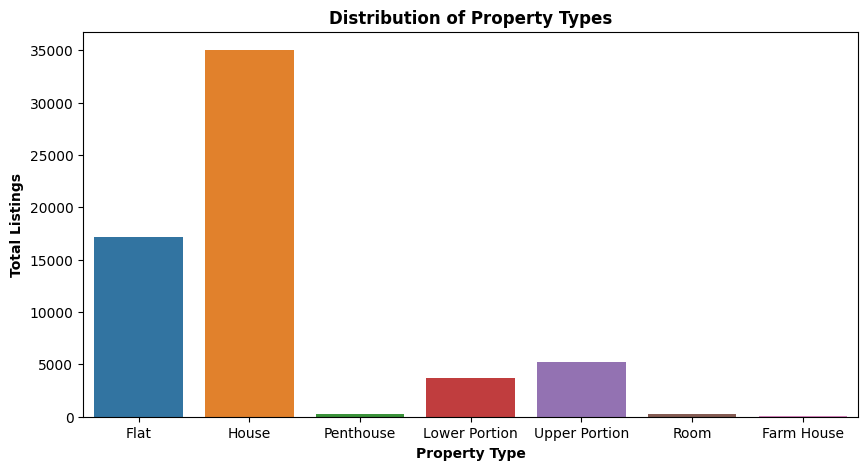

In [12]:
# count plot for the different types of properties
plt.figure(figsize=(10,5))
sns.countplot(x=df['type'])

plt.title('Distribution of Property Types', fontweight = 'bold')
plt.xlabel('Property Type', fontweight = 'bold')
plt.ylabel('Total Listings', fontweight = 'bold')
plt.show()

- ### ***Number of properties listed for sale in cities***

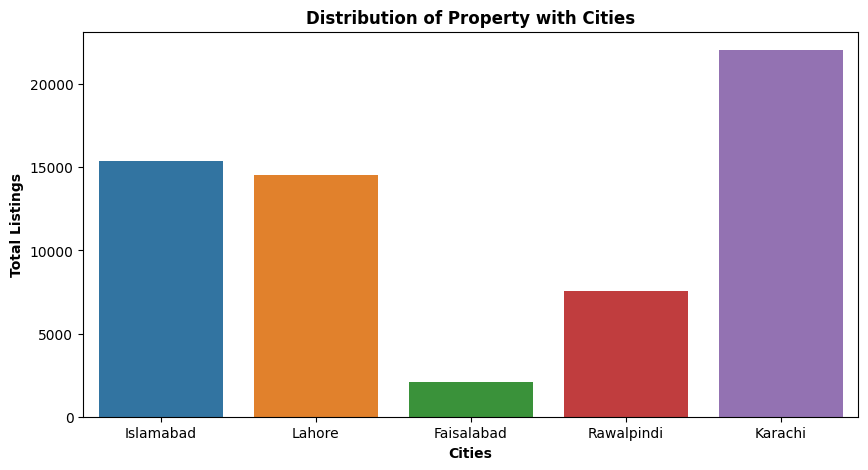

In [13]:
# count plot for the different types of properties
plt.figure(figsize=(10,5))
sns.countplot(x=df['city'])

plt.title('Distribution of Property with Cities', fontweight = 'bold')
plt.xlabel('Cities', fontweight = 'bold')
plt.ylabel('Total Listings', fontweight = 'bold')
plt.show()

- ### ***Determining which locations have the highest and lowest average property prices***

In [14]:
local = {}  # Empty dictionary to hold locality with their average pricings
locality_name = []  # List to hold locality names with max and min average prices
locality_avg_price = []  # List to hold max and min average prices

# Getting unique localities from the 'locality' column
localities = df['locality'].unique()

# Determining average prices of localities
for locality in localities:
    local[locality] = df.loc[df['locality'] == locality, 'price'].mean().round(2)

# Cheapest locality
cheapest_locality = min(local, key=local.get)
locality_name.append(cheapest_locality)
locality_avg_price.append(local[cheapest_locality])

# Costliest locality
costliest_locality = max(local, key=local.get)
locality_name.append(costliest_locality)
locality_avg_price.append(local[costliest_locality])

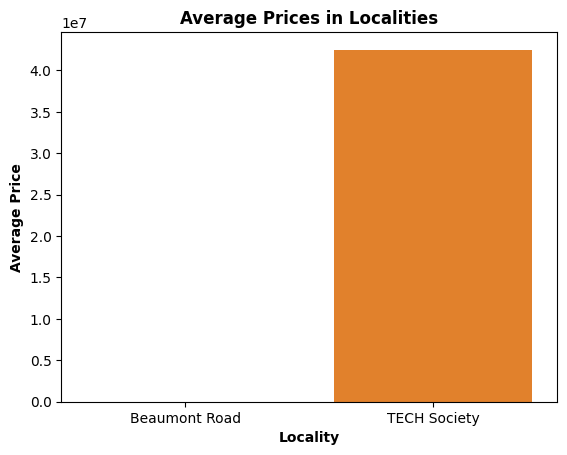

In [15]:
# Plotting this data
sns.barplot(x=locality_name, y=locality_avg_price)
plt.title('Average Prices in Localities', fontweight = 'bold')
plt.xlabel('Locality', fontweight = 'bold')
plt.ylabel('Average Price', fontweight = 'bold')
plt.show()

##   - ***Determining the most popular locality based on the number of listings***

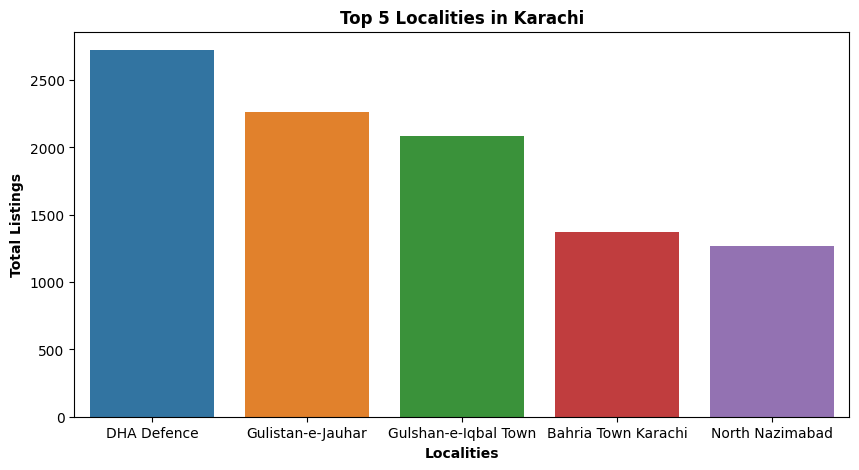

In [16]:
df_karachi = df[df['city'] == 'Karachi']

# Get the top 5 localities based on counts
top_localities = df_karachi['locality'].value_counts().nlargest(5).index

# Filter the DataFrame for only the top 5 localities
df_top_localities = df_karachi[df_karachi['locality'].isin(top_localities)]

# Plot the countplot
plt.figure(figsize=(10, 5))
sns.countplot(x='locality', data=df_top_localities, order=top_localities)

plt.title('Top 5 Localities in Karachi', fontweight = 'bold')
plt.xlabel('Localities', fontweight = 'bold')
plt.ylabel('Total Listings', fontweight = 'bold')
plt.show()

## **3. Property Characteristics:**
   - What is the average number of bedrooms and bathrooms for listed properties?
   - How does property size vary across different cities?

- ### ***Avg No. of bedrooms and Bathrooms listed***

In [17]:
avg_beds = df['beds'].mean().astype(int)
avg_baths = df['baths'].mean().astype(int)

print(f"The average no. of bedrooms in the dataset is: {avg_beds}.")
print(f"The average no. of bathrooms in the dataset is: {avg_baths}.")

The average no. of bedrooms in the dataset is: 3.
The average no. of bathrooms in the dataset is: 3.


- ### ***Property size variation across cities***

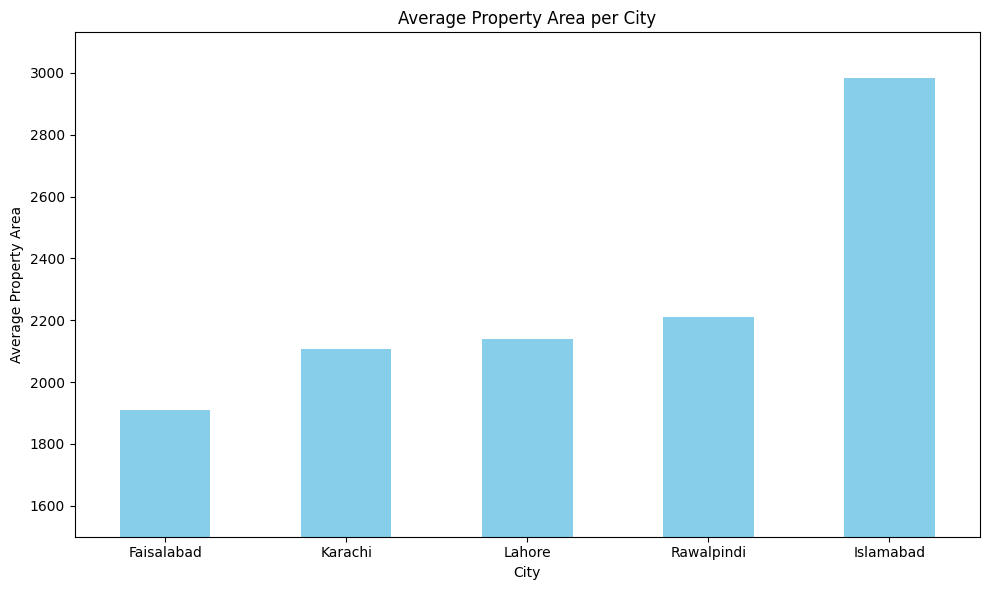

In [18]:
# Calculate average property area (marla) per city
avg_area_per_city = df.groupby('city')['area'].mean().sort_values()

# Plotting the graph
plt.figure(figsize=(10, 6))
avg_area_per_city.plot(kind='bar', color='skyblue')
plt.title('Average Property Area per City')
plt.xlabel('City')
plt.ylabel('Average Property Area')
plt.xticks(rotation=0)
plt.ylim(1500,)

# Display the plot
plt.tight_layout()
plt.show()

# **Machine Learning**
---

In [19]:
label_encoder = LabelEncoder()

In [20]:
col = ['type', 'city', 'location', 'purpose']

for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

In [21]:
df.head()

,type,locality,city,baths,beds,purpose,area,price
0,1,452,1,1,2,1,38,1109
1,1,382,1,2,3,1,54,961
2,2,457,1,5,5,1,78,1174
3,2,198,1,3,4,1,199,1411
4,2,327,1,2,3,1,78,967


In [22]:
X = df.drop('price', axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [24]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_model.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print("| ---------------------- |")
print("| Linear Regression:     |")
print("| RMSE:", round(np.sqrt(mse_lr),2), '          |')
print("| R-squared:", round(r2_lr,4), '     |')
print("| ---------------------- |")

| ---------------------- |
| Linear Regression:     |
| RMSE: 142.63           |
| R-squared: 0.9069      |
| ---------------------- |


In [25]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("| ---------------------- |")
print("| Ridge Regression:      |")
print("| RMSE:", round(np.sqrt(mse_ridge),2), '          |')
print("| R-squared:", round(r2_ridge,4), '     |')
print("| ---------------------- |")

| ---------------------- |
| Ridge Regression:      |
| RMSE: 142.63           |
| R-squared: 0.9069      |
| ---------------------- |


In [26]:
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("| ---------------------- |")
print("| Lasso Regression:      |")
print("| RMSE:", round(np.sqrt(mse_lasso),2), '          |')
print("| R-squared:", round(r2_lasso,4), '     |')
print("| ---------------------- |")

| ---------------------- |
| Lasso Regression:      |
| RMSE: 142.63           |
| R-squared: 0.9069      |
| ---------------------- |


In [27]:
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust alpha and l1_ratio as needed
elasticnet_model.fit(X_train, y_train)
y_pred_elasticnet = elasticnet_model.predict(X_test)

mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print("| ---------------------- |")
print("| Elastic Net Regression:|")
print("| RMSE:", round(np.sqrt(mse_elasticnet),2), '          |')
print("| R-squared:", round(r2_elasticnet,4), '     |')
print("| ---------------------- |")

| ---------------------- |
| Elastic Net Regression:|
| RMSE: 318.27           |
| R-squared: 0.5366      |
| ---------------------- |


In [28]:
dt_model = DecisionTreeRegressor(max_depth=None, random_state=42)  # You can adjust max_depth as needed
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("| ------------------------- |")
print("| Decision Tree Regression: |")
print("| RMSE:", round(np.sqrt(mse_dt),2), '             |')
print("| R-squared:", round(r2_dt,4), '        |')
print("| ------------------------- |")

| ------------------------- |
| Decision Tree Regression: |
| RMSE: 107.35              |
| R-squared: 0.9473         |
| ------------------------- |


In [29]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters as needed
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("| ------------------------- |")
print("| Random Forest Regression: |")
print("| RMSE:", round(np.sqrt(mse_rf),2), '               |')
print("| R-squared:", round(r2_rf,4), '        |')
print("| ------------------------- |")

| ------------------------- |
| Random Forest Regression: |
| RMSE: 93.3                |
| R-squared: 0.9602         |
| ------------------------- |


In [30]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)  
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("| ----------------------------- |")
print("| Gradient Boosting Regression: |")
print("| RMSE:", round(np.sqrt(mse_rf),2), '                   |')
print("| R-squared:", round(r2_rf,4), '            |')
print("| ----------------------------- |")

| ----------------------------- |
| Gradient Boosting Regression: |
| RMSE: 93.3                    |
| R-squared: 0.9602             |
| ----------------------------- |


In [31]:
knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("| ------------------- |")
print("| KNN Regression:     |")
print("| RMSE:", round(np.sqrt(mse_knn),2), '       |')
print("| R-squared:", round(r2_knn,4), '  |')
print("| ------------------- |")

| ------------------- |
| KNN Regression:     |
| RMSE: 263.47        |
| R-squared: 0.6824   |
| ------------------- |


# **Deep Learning**
___

In [32]:
# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),  # Adjust the number of neurons in the hidden layer as needed
    Dense(32, activation='relu'),  # Additional hidden layers can be added if needed
    Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use appropriate optimizer and loss function for regression

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)  # Adjust epochs and batch size as needed

# Predict on the test data
y_pred_ann = model.predict(X_test)

# Calculate evaluation metrics
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print("| ------------------- |")
print("| ANN Regression:     |")
print("| RMSE:", round(np.sqrt(mse_ann),2), '       |')
print("| R-squared:", round(r2_ann,4), '  |')
print("| ------------------- |")

Epoch 1/20
1233/1233 [==============================] - 6s 3ms/step - loss: 268426.1562 - val_loss: 164589.2500
Epoch 2/20
1233/1233 [==============================] - 3s 3ms/step - loss: 110948.6406 - val_loss: 77714.7734
Epoch 3/20
1233/1233 [==============================] - 4s 3ms/step - loss: 50667.5703 - val_loss: 28274.6133
Epoch 4/20
1233/1233 [==============================] - 4s 3ms/step - loss: 21234.6562 - val_loss: 16852.1074
Epoch 5/20
1233/1233 [==============================] - 4s 3ms/step - loss: 16753.5723 - val_loss: 15779.8799
Epoch 6/20
1233/1233 [==============================] - 4s 3ms/step - loss: 16168.8359 - val_loss: 15903.9756
Epoch 7/20
1233/1233 [==============================] - 4s 3ms/step - loss: 15558.9678 - val_loss: 14455.6748
Epoch 8/20
1233/1233 [==============================] - 4s 3ms/step - loss: 15256.4717 - val_loss: 14138.0479
Epoch 9/20
1233/1233 [==============================] - 4s 3ms/step - loss: 14935.4531 - val_loss: 14006.9512
Epoch 1